# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

### (1) Definition of probability intervals for assumed probability density function

Assuming gaussian probability distribution with variable sigma

In [3]:
# Variable pdf width!!!
# Precision better for small than for large mean

def sigma(mean):
    sig = 1.+np.arctan(mean-1)/np.pi
    return sig

# Return value of x corresponsing to upper (one-side) limit on given CL
# Use 1-CL for lower limit

def problim(mean,cl):
    
# Use inverse survival function from scipy (inverse of 1 - cumulative distribution)

    xlim = norm.isf(1-cl)

    return mean+xlim*sigma(mean) 


### (2) Define set of hypothesis

In [10]:
# Considered values of true mean

# vmean = np.linspace(0.,6.0,13)
vmean = np.linspace(0.,6.0,121)
# vmean = np.linspace(0.,6.0,601)

CL = 0.95            # One sided! 

# Lower edge of x probability intervals

vlow = problim(vmean,1-CL)


### (3)  Print interval information

In [11]:
print("\nProbability intervals for x:")

print("\n  true mean     x_low")

for im in range(vmean.size) :
    print ("%10.3f   %8.3f" % (vmean[im],vlow[im]))



Probability intervals for x:

  true mean     x_low
     0.000     -1.234
     0.050     -1.197
     0.100     -1.161
     0.150     -1.126
     0.200     -1.092
     0.250     -1.058
     0.300     -1.025
     0.350     -0.993
     0.400     -0.962
     0.450     -0.932
     0.500     -0.902
     0.550     -0.873
     0.600     -0.846
     0.650     -0.819
     0.700     -0.792
     0.750     -0.767
     0.800     -0.742
     0.850     -0.717
     0.900     -0.693
     0.950     -0.669
     1.000     -0.645
     1.050     -0.621
     1.100     -0.597
     1.150     -0.573
     1.200     -0.548
     1.250     -0.523
     1.300     -0.497
     1.350     -0.471
     1.400     -0.444
     1.450     -0.416
     1.500     -0.388
     1.550     -0.358
     1.600     -0.328
     1.650     -0.297
     1.700     -0.265
     1.750     -0.232
     1.800     -0.198
     1.850     -0.164
     1.900     -0.129
     1.950     -0.093
     2.000     -0.056
     2.050     -0.019
     2.100      0.019
 

### (4) Draw probability intervals

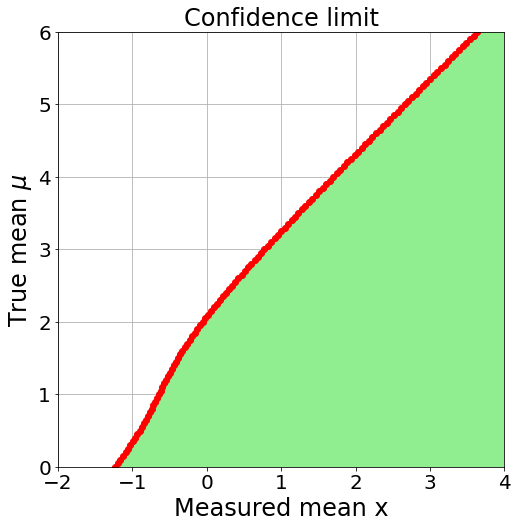

In [16]:
# Plot ranges

Xmin=-2
Xmax=4
Ymin=0
Ymax=6


plt.figure(figsize=(8, 8))

plt.hlines(vmean,vlow,Xmax,color='lightgreen',linewidth=5)

plt.plot(vlow,vmean,'o',color='red')

plt.title("Confidence limit",size=24)
plt.xlabel("Measured mean x",size=24)
plt.ylabel("True mean $\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')


fname = '07_gauss_interval2_ul_1.png'
plt.savefig(fname)


### (5) Hypothetical measurement

In [13]:
Xm = 2.3

# Look for limit point in the probability limit tables

iul = np.argmax(Xm < vlow)

# Interpolate between points for higher precision (linear interpolation)

frac = (Xm-vlow[iul-1])/(vlow[iul]-vlow[iul-1])
ul=frac*vmean[iul]+(1-frac)*vmean[iul-1]
print('Upper limit : %.4f' % (ul))


Upper limit : 4.6264


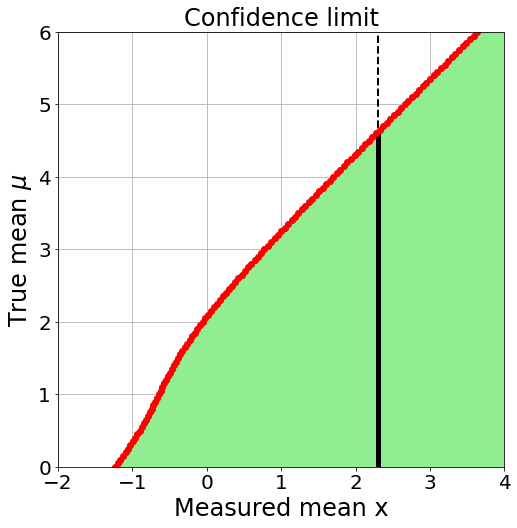

In [17]:
plt.figure(figsize=(8, 8))

plt.hlines(vmean,vlow,Xmax,color='lightgreen',linewidth=5)

plt.plot(vlow,vmean,'o',color='red')

plt.vlines(Xm,Ymin,Ymax,color='black',linewidth=2,linestyles='dashed')
plt.vlines(Xm,Ymin,ul,color='black',linewidth=5,linestyles='solid')

plt.title("Confidence limit",size=24)
plt.xlabel("Measured mean x",size=24)
plt.ylabel("True mean $\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')


fname = '07_gauss_interval2_ul_2.png'
plt.savefig(fname)
